<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_uid                1000 non-null   int64 
 1   date_joined             1000 non-null   object
 2   date_of_first_purhcase  576 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_uid                1000 non-null   int64         
 1   date_joined             1000 non-null   datetime64[ns]
 2   date_of_first_purhcase  576 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 23.6 KB
     user_uid date_joined date_of_first_purhcase            purachse_flag
0           6  2021-06-04             2021-06-0

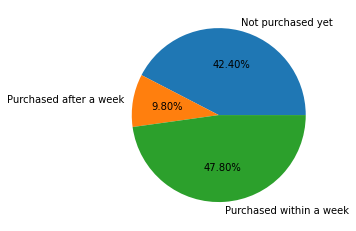

In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

User_purchase=pd.read_csv('user_purchase_data.csv')
User_purchase.info()
User_purchase['date_joined'] = pd.to_datetime(User_purchase['date_joined'])
User_purchase['date_of_first_purhcase'] = pd.to_datetime(User_purchase['date_of_first_purhcase'])
User_purchase.info()

User_purchase['purachse_flag'] = np.where(User_purchase['date_of_first_purhcase'].isnull(),'Not purchased yet', \
                                          np.where(User_purchase['date_joined']-datetime.timedelta(days = -7) > User_purchase['date_of_first_purhcase'],\
                                                   'Purchased within a week','Purchased after a week'))
print (User_purchase)

count = User_purchase['purachse_flag'].value_counts()
print(count)

freqdf = User_purchase.groupby(['purachse_flag']).count()
print(freqdf)

mylabels = freqdf.index
plt.pie(freqdf['user_uid'], labels = mylabels,autopct='%1.2f%%')
#plt.legend()
plt.show()

In [21]:
User_subscribe=pd.read_csv('track_subscription_data.csv')
print(User_subscribe)
User_subscribe = User_subscribe.rename(columns={'user_id': 'user_uid'})
print(User_subscribe)

      user_id        track_slug subscription_date
0           6        kerala-psc        2021-06-04
1           6              KTET        2021-06-04
2         608    spoken-english        2021-06-04
3         608             APPSC        2021-06-04
4         608     Eng_With_Awal        2021-06-04
...       ...               ...               ...
1573   403080        kerala-psc        2021-08-02
1574   403486    spoken-english        2021-08-02
1575   404095  Spoken_eng_hindi        2021-08-02
1576   404277  Spoken_eng_hindi        2021-08-02
1577   404290    spoken-english        2021-08-02

[1578 rows x 3 columns]
      user_uid        track_slug subscription_date
0            6        kerala-psc        2021-06-04
1            6              KTET        2021-06-04
2          608    spoken-english        2021-06-04
3          608             APPSC        2021-06-04
4          608     Eng_With_Awal        2021-06-04
...        ...               ...               ...
1573    403080    

In [30]:
purch_subs_combined = pd.merge(
    left=User_purchase,
    right=User_subscribe,
    how="outer",
    on="user_uid")
print(purch_subs_combined.count())

user_uid                  1616
date_joined               1616
date_of_first_purhcase    1096
purachse_flag             1616
track_slug                1578
subscription_date         1578
dtype: int64


In [65]:
count_purch_flag = purch_subs_combined['purachse_flag'].value_counts()
print(count_purch_flag)

count_track_slug = purch_subs_combined['track_slug'].value_counts()
print(count_track_slug)

Purchased within a week    900
Not purchased yet          520
Purchased after a week     196
Name: purachse_flag, dtype: int64
Spoken_eng_hindi     284
spoken-english       213
kerala-psc           163
BANK-INS              64
ssc                   57
                    ... 
I_S_T                  1
JEE                    1
NEET                   1
SDQ                    1
YourStory_Academy      1
Name: track_slug, Length: 66, dtype: int64


In [63]:
purch_subs_final = purch_subs_combined[(purch_subs_combined['track_slug'].notnull()) & (purch_subs_combined['purachse_flag'] != 'Not purchased yet')]
print(purch_subs_final.count())
distinct_cnt = len(pd.unique(purch_subs_final['user_uid']))
tot_count = purch_subs_final['user_uid'].count()
print(distinct_cnt)
print(tot_count)
avg = tot_count/distinct_cnt
print('Average number of subscriptions per purchased user = '+str(avg))

user_uid                  1096
date_joined               1096
date_of_first_purhcase    1096
purachse_flag             1096
track_slug                1096
subscription_date         1096
dtype: int64
576
1096
Average number of subscriptions per purchased user = 1.9027777777777777
